### **0. Set-up**

In [57]:
# Import libraries and utils
%run '../../utils.ipynb'

In [58]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/nl/f7.csv")

In [59]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/en/f7.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [60]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,oud,nieuw,1.0,0.1,1.0,0.10,1.0,1.00,2.00,0.1,2.00,2.00,0.10,0.1,0.10,0.2,1.00
1,slim,intelligent,1.0,0.9,0.8,0.95,0.9,0.90,8.00,0.9,7.00,8.00,0.90,0.9,0.95,0.9,0.90
2,hard,moeilijk,0.0,0.2,0.2,0.30,0.2,0.20,4.00,0.2,2.00,3.00,0.20,0.2,0.20,0.4,0.30
3,gelukkig,vrolijk,0.5,0.8,0.6,0.80,0.8,0.70,6.00,0.8,6.50,8.00,0.70,0.7,0.80,0.8,0.80
4,hard,stoer,0.2,0.5,0.3,0.50,0.4,0.40,4.00,0.5,4.00,4.00,0.50,0.4,0.60,0.6,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,samenvoegen,verwerven,0.0,1.0,2.0,0.10,0.1,0.05,0.20,1.0,0.05,0.10,0.10,0.2,0.20,1.0,0.30
993,sturen,bijwonen,0.0,1.0,1.0,0.10,0.2,0.10,0.05,1.0,0.05,0.10,0.05,0.1,0.10,1.0,0.05
994,verzamelen,bijwonen,0.0,2.0,2.0,0.20,0.2,0.20,0.10,2.0,0.05,0.10,0.10,0.3,0.20,1.0,0.10
995,opnemen,intrekken,0.0,1.0,1.0,0.10,0.2,0.10,0.20,1.0,0.10,0.05,0.10,0.2,0.10,1.0,0.10


In [61]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,old,new,0.1,0.1,1.0,0.2,0.1,2.0,0.1,0.2,0.10,0.2,0.1,0.1,0.1,3.0,1.0
1,smart,intelligent,0.9,0.9,1.0,0.9,0.9,9.0,0.9,0.9,0.90,0.9,0.9,0.9,0.9,9.0,0.9
2,hard,difficult,0.3,0.8,0.5,0.7,0.8,7.0,0.8,0.7,0.20,0.9,0.2,0.4,0.9,6.0,0.8
3,happy,cheerful,0.8,0.7,0.2,0.6,0.7,8.0,0.8,0.8,0.90,0.8,0.9,0.8,0.7,6.0,0.7
4,hard,easy,0.1,0.1,0.2,0.1,0.1,3.0,0.1,0.4,0.10,0.1,0.1,0.2,0.1,2.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,join,acquire,1.0,9.0,0.3,0.1,1.0,0.0,0.0,1.0,0.20,1.0,0.0,0.1,0.0,1.0,0.7
993,send,attend,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.1,0.0,0.0,0.1
994,gather,attend,1.0,0.0,0.8,0.1,1.0,0.0,0.0,0.5,0.10,1.0,0.0,0.1,0.0,0.0,0.7
995,absorb,withdraw,0.0,0.0,0.2,0.1,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.1,0.0,0.0,0.3


### **1. Data Processing**

In [62]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,oud,nieuw,0.79,0.75
1,slim,intelligent,2.26,2.81
2,hard,moeilijk,0.77,1.22
3,gelukkig,vrolijk,1.95,2.56
4,hard,stoer,1.16,1.47
...,...,...,...,...
992,samenvoegen,verwerven,0.43,0.57
993,sturen,bijwonen,0.33,0.42
994,verzamelen,bijwonen,0.57,0.78
995,opnemen,intrekken,0.35,0.41


In [63]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,old,new,0.56,0.87
1,smart,intelligent,1.99,2.85
2,hard,difficult,1.40,2.09
3,happy,cheerful,1.56,2.25
4,hard,easy,0.45,0.86
...,...,...,...,...
992,join,acquire,1.03,2.25
993,send,attend,0.03,0.05
994,gather,attend,0.35,0.43
995,absorb,withdraw,0.05,0.09


In [64]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,oud,nieuw,0.79,0.75,old,new,0.56,0.87
1,slim,intelligent,2.26,2.81,smart,intelligent,1.99,2.85
2,hard,moeilijk,0.77,1.22,hard,difficult,1.40,2.09
3,gelukkig,vrolijk,1.95,2.56,happy,cheerful,1.56,2.25
4,hard,stoer,1.16,1.47,hard,easy,0.45,0.86
...,...,...,...,...,...,...,...,...
992,samenvoegen,verwerven,0.43,0.57,join,acquire,1.03,2.25
993,sturen,bijwonen,0.33,0.42,send,attend,0.03,0.05
994,verzamelen,bijwonen,0.57,0.78,gather,attend,0.35,0.43
995,opnemen,intrekken,0.35,0.41,absorb,withdraw,0.05,0.09


### **2. Descriptive Statistics**

In [65]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,997.00,997.00,997.00,997.00
mean,3.11,2.71,1.39,1.30
std,2.37,2.33,0.88,0.89
min,0.00,0.00,0.00,0.00
25%,1.17,0.93,0.73,0.67
50%,2.45,2.00,1.18,1.05
75%,4.85,4.00,1.92,1.76
max,9.57,10.00,3.98,4.37
median,2.45,2.00,1.18,1.05


#### **2.1. SimLex-999**

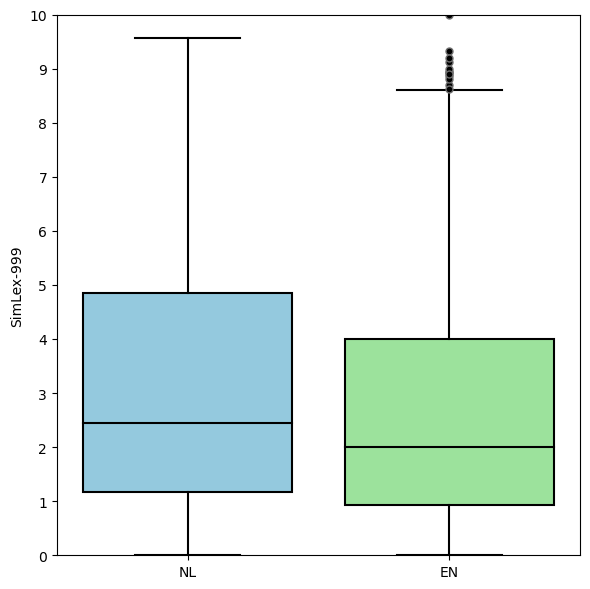

In [66]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

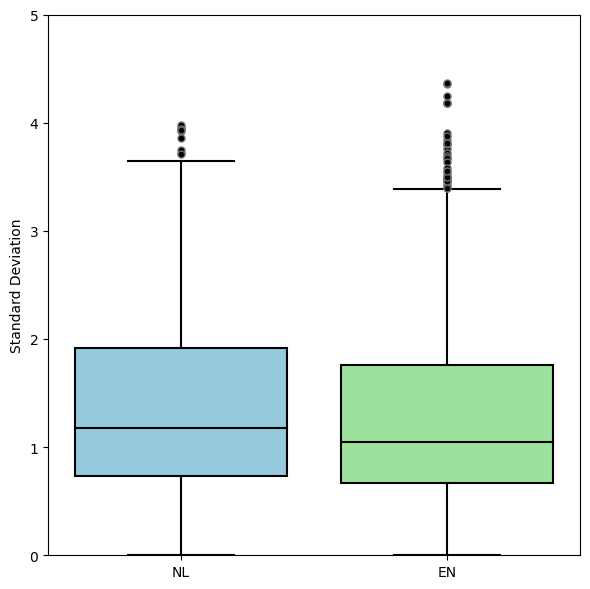

In [67]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

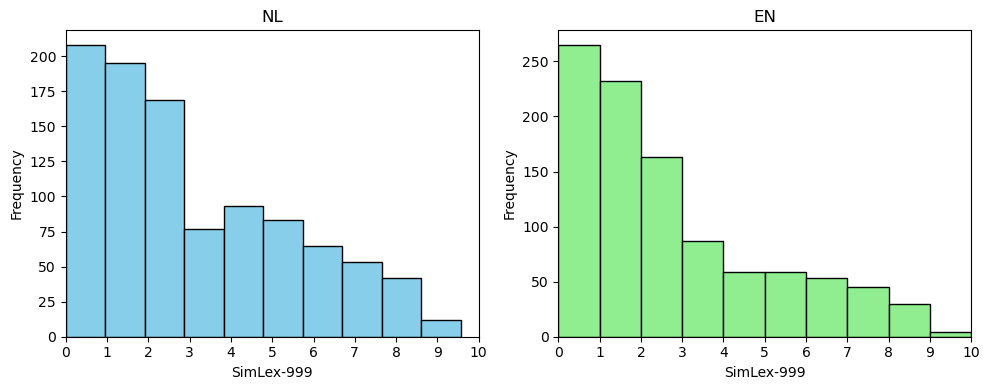

In [68]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

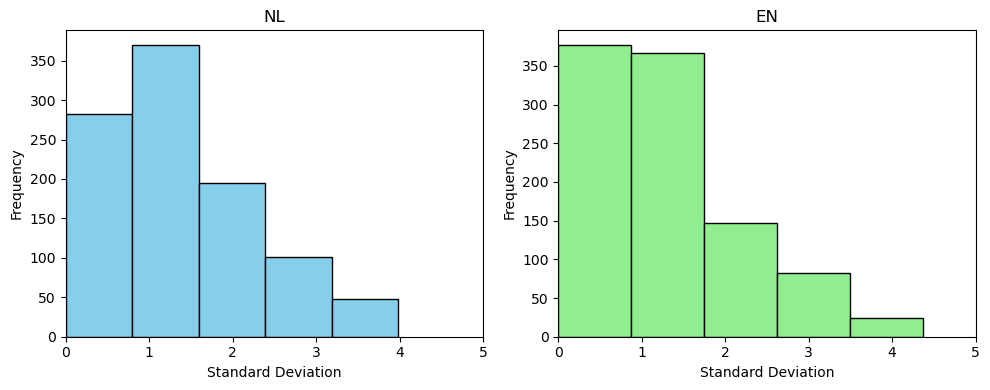

In [69]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [70]:
# Count outliers
print_outlier_counts(nl_pred)

Outliers in nl_pred_sd: 9
No outliers found in columns: nl_pred_sl


In [71]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')


Outliers in nl_pred_sd:
           word1         word2  nl_pred_sl  nl_pred_sd
117    onderkant     bovenkant        3.07        3.72
396     anarchie         chaos        5.95        3.75
495        wagen       rijtuig        4.97        3.96
506      formule  vergelijking        4.58        3.71
558       kanker        ziekte        5.39        3.92
634         nier        orgaan        4.73        3.98
638        tabak       sigaret        5.16        3.94
887    verwerven    verkrijgen        3.54        3.86
893  inspecteren    examineren        3.54        3.93


#### **4.2. EN**

In [72]:
# Count outliers
print_outlier_counts(en_pred)

Outliers in en_pred_sl: 12
Outliers in en_pred_sd: 33


In [73]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sd')


Outliers in en_pred_sd:
              word1         word2  en_pred_sl  en_pred_sd
60          crucial     important        3.92        3.54
69          bizarre       strange        4.15        3.79
109            wife       husband        7.35        4.18
111           groom         bride        7.41        4.18
113           south         north        6.68        4.36
115           uncle          aunt        7.41        4.18
116           horse          mare        5.49        4.18
117          bottom           top        2.28        3.43
180        employer      employee        5.78        4.25
183         alcohol        brandy        5.09        3.76
184         victory       triumph        6.03        4.37
187           motel           inn        5.13        3.72
189           steak          meat        4.79        3.46
191            band     orchestra        5.32        3.90
196         alcohol           gin        4.94        3.66
241        molecule          atom        4.40  

#### **4.3. Add to Summary**

In [74]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,997.00,997.00,997.00,997.00
mean,3.11,2.71,1.39,1.30
std,2.37,2.33,0.88,0.89
min,0.00,0.00,0.00,0.00
25%,1.17,0.93,0.73,0.67
50%,2.45,2.00,1.18,1.05
75%,4.85,4.00,1.92,1.76
max,9.57,10.00,3.98,4.37
median,2.45,2.00,1.18,1.05
outliers,0.00,12.00,9.00,33.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

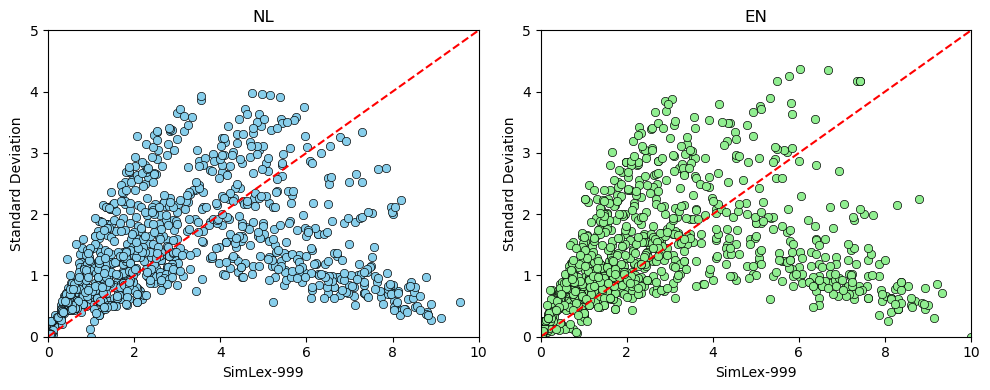

In [75]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [76]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,0.44623,5.983569e-50,significant
1,en_pred_sl,en_pred_sd,0.53552,4.494629e-75,significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

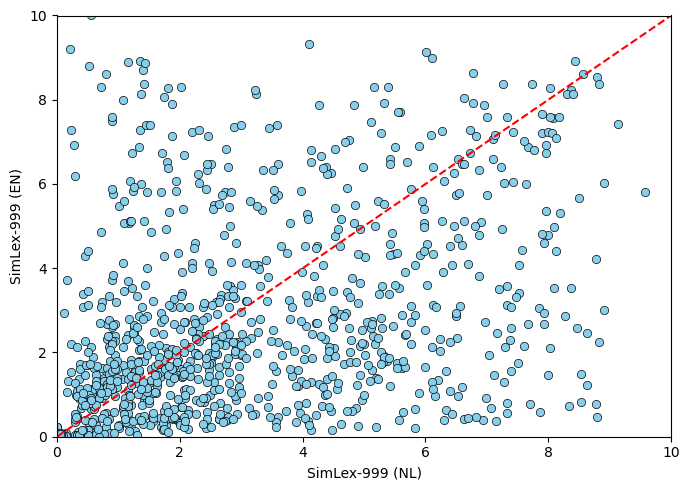

In [77]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [78]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.46139
P-value: 1.0382364606321795e-53
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

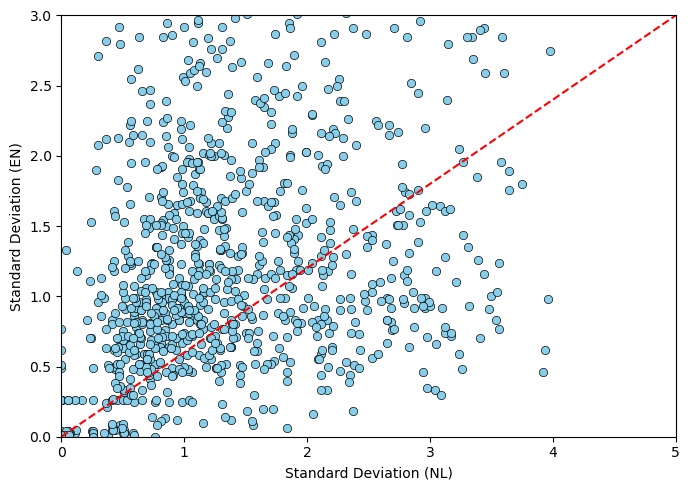

In [79]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [80]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: 0.3941
P-value: 2.164429506080293e-38
The correlation is statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [81]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 6.74


#### **7.3. Mean Absolute Error (MAE)**

In [82]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.86
